# Kseniia Blokhina - BLO0021 - 2048 SOLVER 

In [1]:
import numpy as np 
import copy as cp
import random
import math
import os
import csv

# BASIC RULES AND SOLVER LOGIC PREPARATIONS

In [2]:
def add_score(sc, val):
    sc += val
    return sc


def move_left(grid, score, max_tile, move_stats=None):
    if move_stats is not None:
        move_stats['left'] += 1
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
        for j in range(3):
            if grid[i,j] == grid[i,j+1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j+1] = 0
                max_tile = max(max_tile, grid[i,j])
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
    return grid, score, max_tile


def move_right(grid, score, max_tile, move_stats=None):
    if move_stats is not None:
        move_stats['right'] += 1
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[i,j] == grid[i,j-1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j-1] = 0
                max_tile = max(max_tile, grid[i,j])
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
    return grid, score, max_tile


def move_up(grid, score, max_tile, move_stats=None):
    if move_stats is not None:
        move_stats['up'] += 1
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
        for j in range(3):
            if grid[j,i] == grid[j+1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j+1,i] = 0
                max_tile = max(max_tile, grid[j,i])
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
    return grid, score, max_tile


def move_down(grid, score, max_tile, move_stats=None):
    if move_stats is not None:
        move_stats['down'] += 1
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[j,i] == grid[j-1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j-1,i] = 0
                max_tile = max(max_tile, grid[j,i])
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
    return grid, score, max_tile


def add_new_number(grid):
    zero_indices = np.where(grid == 0)
    if len(zero_indices[0]) == 0:
        return False
    index = np.random.choice(len(zero_indices[0]))
    i, j = zero_indices[0][index], zero_indices[1][index]
    grid[i,j] = 2 if np.random.random() < 0.9 else 4
    return True


def check_game_over(grid):
    
    if np.all(grid) == False:
        return False
    
    for row in range(4):
        for col in range(4):
            if row != 3:
                if (grid[row,col]==grid[row+1,col]):
                    return False
            if col != 3:
                if (grid[row,col]==grid[row,col+1]):
                    return False
            
    return True


def check_win(grid):
    return 2048 in grid


def play_2048(grid, move, score, max_tile, move_stats=None):
    orig_grid = cp.deepcopy(grid)
    
    if check_game_over(grid):
        raise RuntimeError("GO")
        
    if move == 'left':
        grid, score, max_tile = move_left(grid, score, max_tile, move_stats)
    elif move == 'right':
        grid, score, max_tile = move_right(grid, score, max_tile, move_stats)
    elif move == 'up':
        grid, score, max_tile = move_up(grid, score, max_tile, move_stats)
    elif move == 'down':
        grid, score, max_tile = move_down(grid, score, max_tile, move_stats)
    else:
        raise ValueError("Invalid move")

    if not np.array_equal(grid, orig_grid):
        add_new_number(grid)
    
    return grid, score, max_tile


def new_game():
    score = 0
    max_tile = 0
    grid = np.zeros((4, 4), dtype=int)
    add_new_number(grid)
    add_new_number(grid)
    
    return grid, score, max_tile


def print_grid(grid, score, max_tile):
    print("+----+----+----+----+")
    for i in range(4):
        line = "|"
        for j in range(4):
            if grid[i,j] == 0:
                line += "    |"
            else:
                line += "{:4d}|".format(grid[i,j])
        print(line)
        print("+----+----+----+----+")
        
        

In [3]:
grid, score, max_tile = new_game()
for i in range(1000):
    direction = np.random.choice(('left','right','up','down'))
    try:
        grid, score, max_tile = play_2048(grid, direction, score, max_tile)
    except RuntimeError as inst:
        if(str(inst)=="GO"):
            print("GAME OVER in ",(i+1)," moves")
        elif(str(inst)=="WIN"):
            print("WIN in ",(i+1)," moves")
        break
print_grid(grid, score, max_tile)

GAME OVER in  197  moves
+----+----+----+----+
|   8|  32|   2|   4|
+----+----+----+----+
|  16| 128|   4|   2|
+----+----+----+----+
|   8|  32|  16|   4|
+----+----+----+----+
|   4|  64|   4|   2|
+----+----+----+----+


# RANDOM SOLVER

In [122]:
def random_solver(grid, score, max_tile, max_moves=1000):
    directions = ['left', 'right', 'up', 'down']
    move_stats = {'left': 0, 'right': 0, 'up': 0, 'down': 0}
    turn = 0

    for i in range(max_moves):
        turn = i + 1
        direction = random.choice(directions)
        try:
            grid, score, max_tile = play_2048(grid, direction, score, max_tile, move_stats)
        except RuntimeError as inst:
            if str(inst) == "GO":
                print(f"GAME OVER in {turn} turns")
            elif str(inst) == "WIN":
                print(f"WIN in {turn} turns")
            break

    print("\nMove statistics:")
    for move, count in move_stats.items():
        print(f"{move:>5}: {count}")
    print(f"Moves: {turn}")
    print('Score: ', score)
    print('Max Tile: ', max_tile)

    return grid, score, max_tile, move_stats, turn


Testing ...

In [123]:
grid, score, max_tile = new_game()

grid, score, max_tile, move_stats, turn = random_solver(grid, score, max_tile)

print_grid(grid, score, max_tile)

GAME OVER in 72 turns

Move statistics:
 left: 14
right: 22
   up: 20
 down: 15
Moves: 72
Score:  380
Max Tile:  32
+----+----+----+----+
|   2|   4|   8|   4|
+----+----+----+----+
|   4|  32|   4|   2|
+----+----+----+----+
|  16|   8|  16|   4|
+----+----+----+----+
|   4|   2|   4|  32|
+----+----+----+----+


# RULE_BASED (bottom‐left corner) SOLVER

In [124]:
move_funcs = {
    'left':  move_left,
    'right': move_right,
    'up':    move_up,
    'down':  move_down,
}

def can_move(grid, direction):
    g_copy = cp.deepcopy(grid)
    g2, _, _ = move_funcs[direction](g_copy, 0, 0)
    return not np.array_equal(grid, g2)


def rule_based_solver(grid, score, max_tile, max_turns=1000):
    move_stats = {'left':0, 'right':0, 'up':0, 'down':0}

    for turn in range(1, max_turns+1):
        if can_move(grid, 'left'):
            direction = 'left'
        elif can_move(grid, 'down'):
            direction = 'down'
        elif can_move(grid, 'up'):
            direction = 'up'
        elif can_move(grid, 'right'):
            direction = 'right'
        else:
            print(f"GAME OVER in {turn} turns (no legal move)")
            break

        try:
            grid, score, max_tile = play_2048(
                grid, direction, score, max_tile, move_stats
            )
        except RuntimeError as inst:
            outcome = "WIN" if str(inst)=="WIN" else "GAME OVER"
            print(f"{outcome} in {turn} turns")
            break

    print("\nMove statistics:")
    for mv, cnt in move_stats.items():
        print(f"{mv:>5}: {cnt}")
    print(f"Moves: {turn}")
    print('Score: ', score)
    print('Max Tile: ', max_tile)

    return grid, score, max_tile, move_stats, turn


Testing ...

In [125]:
grid, score, max_tile = new_game()

grid, score, max_tile, move_stats, turn = rule_based_solver(grid, score, max_tile)

print_grid(grid, score, max_tile)

GAME OVER in 185 turns (no legal move)

Move statistics:
 left: 134
right: 0
   up: 5
 down: 45
Moves: 185
Score:  1824
Max Tile:  128
+----+----+----+----+
|  32|   8|   4|   2|
+----+----+----+----+
|  64|  32|   8|   4|
+----+----+----+----+
|   2|  64|  16|   8|
+----+----+----+----+
| 128|   4|  32|   2|
+----+----+----+----+


# MINIMAX

In [4]:
# Heuristic function

def evaluate_grid_state(grid, current_max_tile, current_score):
    size = grid.shape[0]
    heuristic_score = 0.0

    # --- Heuristic Weights ---
    WEIGHT_EMPTY           = 200.0   
    WEIGHT_SMOOTHNESS       =   1.0
    WEIGHT_MONOTONICITY     =  10.0 
    WEIGHT_MAX_TILE_CORNER  = 500.0  
    WEIGHT_MAX_TILE_FACTOR  =  100.0  
    WEIGHT_SCORE_FACTOR     =   50.0  
    WEIGHT_MERGING          =   3.0 

    empty_cells = 0
    smoothness = 0.0
    monotonicity_penalty = 0.0
    max_pos_bonus = 0.0
    merge_score = 0.0

    log2_grid = np.zeros_like(grid, dtype=float)
    for r in range(size):
        for c in range(size):
            val = grid[r, c]
            if val == 0:
                empty_cells += 1
            else:
                log2_grid[r, c] = math.log2(val)

    heuristic_score += empty_cells * WEIGHT_EMPTY

    # smoothness & monotonicity
    for r in range(size):
        for c in range(size):
            if grid[r, c] == 0:
                continue
            val = log2_grid[r, c]
            # right neighbour
            if c + 1 < size and grid[r, c+1] > 0:
                neigh = log2_grid[r, c+1]
                smoothness -= abs(val - neigh)
                if neigh < val:
                    monotonicity_penalty += (val - neigh)
            # down neighbour
            if r + 1 < size and grid[r+1, c] > 0:
                neigh = log2_grid[r+1, c]
                smoothness -= abs(val - neigh)
                if neigh < val:
                    monotonicity_penalty += (val - neigh)

    heuristic_score += smoothness * WEIGHT_SMOOTHNESS
    heuristic_score -= monotonicity_penalty * WEIGHT_MONOTONICITY

    corner_r, corner_c = size-1, size-1
    actual_max = grid.max()
    if actual_max > 0:
        if grid[corner_r, corner_c] == actual_max:
            max_pos_bonus += math.log2(actual_max) * WEIGHT_MAX_TILE_CORNER
        else:
            max_positions = np.argwhere(grid == actual_max)
            if len(max_positions) > 0:
                r, c = max_positions[0]
                dist = abs(corner_r - r) + abs(corner_c - c)
                max_pos_bonus -= dist * math.log2(actual_max) * 0.5
    heuristic_score += max_pos_bonus

    for r in range(size):
        for c in range(size):
            if grid[r,c] != 0:
                if c + 1 < size and grid[r,c] == grid[r,c+1]:
                    merge_score += log2_grid[r, c]
                if r + 1 < size and grid[r,c] == grid[r+1,c]:
                    merge_score += log2_grid[r, c]
    heuristic_score += merge_score * WEIGHT_MERGING

    if actual_max > 0:
        heuristic_score += math.log2(actual_max) * WEIGHT_MAX_TILE_FACTOR
    heuristic_score += current_score * WEIGHT_SCORE_FACTOR

    return heuristic_score

In [127]:
def minimax_alpha_beta(grid, score, max_tile, depth, alpha, beta, maximizing_player=True):
    if depth == 0 or check_game_over(grid):
        return evaluate_grid_state(grid, max_tile, score)

    if maximizing_player:
        max_eval = -math.inf
        for mv in ('down','right','left','up'):
            if not can_move(grid, mv):
                continue
            g2, s2, mt2 = move_funcs[mv](cp.deepcopy(grid), score, max_tile)
            val = minimax_alpha_beta(g2, s2, mt2, depth-1, alpha, beta, False)
            max_eval = max(max_eval, val)
            alpha = max(alpha, val)
            if beta <= alpha:
                break
        return max_eval

    else:
        min_eval = math.inf
        zeros = list(zip(*np.where(grid == 0)))
        if not zeros:
            return evaluate_grid_state(grid, max_tile, score)
        for (r, c) in zeros:
            g2 = cp.deepcopy(grid)
            g2[r, c] = 2
            val = minimax_alpha_beta(g2, score, max_tile, depth-1, alpha, beta, True)
            min_eval = min(min_eval, val)
            beta = min(beta, val)
            if beta <= alpha:
                break
        return min_eval


def best_move(grid, score, max_tile, depth=5):
    alpha, beta = -math.inf, math.inf
    best_m, best_val = None, -math.inf

    for mv in ('down','right','left','up'):
        if not can_move(grid, mv):
            continue
        g2, s2, mt2 = move_funcs[mv](cp.deepcopy(grid), score, max_tile)
        val = minimax_alpha_beta(g2, s2, mt2, depth-1, alpha, beta, False)
        if val > best_val:
            best_val, best_m = val, mv
        alpha = max(alpha, val)

    return best_m


def minimax_solver(grid, score, max_tile, max_turns=1500):
    move_stats = {'left': 0, 'right': 0, 'up': 0, 'down': 0}
    turn = 0
    for turn in range(1, max_turns+1):
        mv = best_move(grid, score, max_tile)
        if mv is None:
            break
        try:
            grid, score, max_tile = play_2048(grid, mv, score, max_tile, move_stats)
        except RuntimeError as inst:
            print(f"{str(inst)} in {turn} turns")
            break

    print("\nMove statistics:")
    for mv_name, cnt in move_stats.items():
        print(f"{mv_name:>5}: {cnt}")
    print(f"Moves: {turn}")
    print('Score: ', score)
    print('Max Tile: ', max_tile)
    return grid, score, max_tile, move_stats, turn


Testing ...

In [128]:
grid, score, max_tile = new_game()

grid, score, max_tile, move_stats, turn = minimax_solver(grid, score, max_tile)

print_grid(grid, score, max_tile)


Move statistics:
 left: 49
right: 67
   up: 54
 down: 97
Moves: 268
Score:  3220
Max Tile:  256
+----+----+----+----+
|   2| 128|   8|   2|
+----+----+----+----+
|   8|  64|  32|  16|
+----+----+----+----+
|  16|  32| 256|   8|
+----+----+----+----+
|   8|  16|   4|   2|
+----+----+----+----+


# EXPECTIMAX

In [5]:
def expectimax_recursive(grid, score, max_tile, depth, is_max):
    if depth==0 or check_game_over(grid):
        return evaluate_grid_state(grid, max_tile, score)
    if is_max:
        best = -math.inf
        for mv in ('down','right','left','up'):
            if not can_move(grid, mv): continue
            g2,s2,mt2 = move_funcs[mv](cp.deepcopy(grid), score, max_tile)
            val = expectimax_recursive(g2, s2, mt2, depth-1, False)
            best = max(best, val)
        return best if best!=-math.inf else evaluate_grid_state(grid, max_tile, score)
    else:
        total=0.0
        empties = np.argwhere(grid==0)
        if len(empties)==0:
            return evaluate_grid_state(grid, max_tile, score)
        for (r,c) in empties:
            for tile, p in ((2,0.9),(4,0.1)):
                g2 = cp.deepcopy(grid); g2[r,c]=tile
                total += p * expectimax_recursive(g2, score, max_tile, depth-1, True)
        return total/len(empties)


def expectimax_best_move(grid, score, max_tile, depth=4):
    best_move, best_val = None, -math.inf
    for mv in ('down','right','left','up'):
        if not can_move(grid, mv): continue
        g2,s2,mt2 = move_funcs[mv](cp.deepcopy(grid), score, max_tile)
        val = expectimax_recursive(g2, s2, mt2, depth-1, False)
        if val>best_val:
            best_val,best_move = val,mv
    return best_move


def expectimax_solver(grid, score, max_tile, max_turns=1500):
    move_stats={'left':0,'right':0,'up':0,'down':0}
    turn=0
    for turn in range(1, max_turns+1):
        mv = expectimax_best_move(grid, score, max_tile)
        if mv is None:
            break
        try:
            grid, score, max_tile = play_2048(grid, mv, score, max_tile, move_stats)
        except RuntimeError as inst:
            print(f"{str(inst)} in {turn} turns")
            break

    print("\nMove statistics:")
    
    for m,c in move_stats.items(): print(f"{m:>5}: {c}")
    print(f"Total moves: {turn}")
    print('Score: ', score)
    print('Max Tile: ', max_tile)
    
    return grid, score, max_tile, move_stats, turn


Testing ...

In [150]:
grid, score, max_tile = new_game()

grid, score, max_tile, move_stats, turn = expectimax_solver(grid, score, max_tile)

print_grid(grid, score, max_tile)


Move statistics:
 left: 47
right: 201
   up: 88
 down: 185
Total moves: 522
Score:  7532
Max Tile:  512
+----+----+----+----+
|   2|  64|   8|   2|
+----+----+----+----+
|   4|  32| 256|  16|
+----+----+----+----+
|   8|  64| 128|  32|
+----+----+----+----+
|   2|   8|  32| 512|
+----+----+----+----+


# RUN SOLVERS AND SAVE THE RESULTS

In [6]:
def create_directories(base_dir="results"):
    solvers = ["random_solver", "rule_based_solver", "minimax_solver", "expectimax_solver"]
    
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for solver in solvers:
        solver_directory = os.path.join(base_dir, solver)
        if not os.path.exists(solver_directory):
            os.makedirs(solver_directory)
    
    print(f"Directories {base_dir} and subdirectories created!")

In [7]:
def run_solver_and_collect_results(solver, num_games=50, **solver_kwargs):

    results = []
    for game_idx in range(1, num_games+1):
        grid, score, max_tile = new_game()
        grid, score, max_tile, move_stats, total_moves = solver(
            grid, score, max_tile, **solver_kwargs
        )
        results.append({
            'max_tile':   max_tile,
            'score':      score,
            'total_moves': total_moves,
            'moves_left':  move_stats.get('left',  0),
            'moves_right': move_stats.get('right', 0),
            'moves_up':    move_stats.get('up',    0),
            'moves_down':  move_stats.get('down',  0),
        })
    return results


In [8]:
def save_results_to_file(solver_name, game_results, base_dir="results"):

    folder = os.path.join(base_dir, solver_name)
    os.makedirs(folder, exist_ok=True)
    path = os.path.join(folder, f"{solver_name}_results.csv")
    fieldnames = ['max_tile','score','total_moves','moves_left','moves_right','moves_up','moves_down']
    with open(path, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(game_results)
    print(f"Results for {solver_name} saved to {path}")

In [134]:
def run_all_solvers(num_games=50):
    create_directories()
    solvers = {
        "random_solver":     random_solver,
        "rule_based_solver": rule_based_solver,
        "minimax_solver":    minimax_solver,
        "expectimax_solver": expectimax_solver
    }
    for name, fn in solvers.items():
        print(f"\n>>> Running {name} for {num_games} games...")
        results = run_solver_and_collect_results(fn, num_games=num_games)
        save_results_to_file(name, results)
        
        

In [135]:
run_all_solvers(num_games=50)

Directories results and subdirectories created!

>>> Running random_solver for 50 games...
GAME OVER in 97 turns

Move statistics:
 left: 21
right: 23
   up: 32
 down: 20
Moves: 97
Score:  628
Max Tile:  64
GAME OVER in 133 turns

Move statistics:
 left: 40
right: 27
   up: 29
 down: 36
Moves: 133
Score:  848
Max Tile:  64
GAME OVER in 145 turns

Move statistics:
 left: 27
right: 36
   up: 46
 down: 35
Moves: 145
Score:  1064
Max Tile:  64
GAME OVER in 147 turns

Move statistics:
 left: 30
right: 35
   up: 37
 down: 44
Moves: 147
Score:  1256
Max Tile:  128
GAME OVER in 174 turns

Move statistics:
 left: 38
right: 42
   up: 44
 down: 49
Moves: 174
Score:  1332
Max Tile:  128
GAME OVER in 131 turns

Move statistics:
 left: 34
right: 37
   up: 28
 down: 31
Moves: 131
Score:  1072
Max Tile:  128
GAME OVER in 214 turns

Move statistics:
 left: 57
right: 51
   up: 49
 down: 56
Moves: 214
Score:  1996
Max Tile:  128
GAME OVER in 130 turns

Move statistics:
 left: 25
right: 38
   up: 29
 down

# STATISTICS FOR 30 GAMES

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
def analyze_solver_results(file_path, output_file):

    out_dir = os.path.dirname(output_file)
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir)

    df = pd.read_csv(file_path)

    primary = ['score', 'max_tile', 'total_moves']
    directions = ['moves_left', 'moves_right', 'moves_up', 'moves_down']

    summary = {}
    for m in primary + directions:
        summary[m] = {
            'min': df[m].min(),
            'max': df[m].max(),
            'mean': df[m].mean()
        }

    best_idx  = df['score'].idxmax()
    worst_idx = df['score'].idxmin()
    best_run  = df.loc[best_idx, primary + directions].to_dict()
    worst_run = df.loc[worst_idx, primary + directions].to_dict()

    print(f"Summary for {os.path.basename(file_path)}:")
    for m in primary:
        print(f"  {m.title():<12} min={summary[m]['min']}, max={summary[m]['max']}, avg={summary[m]['mean']:.2f}")
    print("  Directional moves:")
    for d in directions:
        print(f"    {d:<12} min={summary[d]['min']}, max={summary[d]['max']}, avg={summary[d]['mean']:.2f}")
    print("  Best score run:", best_run)
    print("  Worst score run:", worst_run)

    with open(output_file, 'w') as f:
        f.write(f"Summary for {os.path.basename(file_path)}\n\n")
        for m in primary:
            f.write(f"{m.title():<12} min={summary[m]['min']}, max={summary[m]['max']}, avg={summary[m]['mean']:.2f}\n")
        f.write("\nDirectional moves:\n")
        for d in directions:
            f.write(f"  {d:<12} min={summary[d]['min']}, max={summary[d]['max']}, avg={summary[d]['mean']:.2f}\n")
        f.write(f"\nBest score run:  {best_run}\n")
        f.write(f"Worst score run: {worst_run}\n")


## Random solver

In [138]:
random_input = 'results/random_solver/random_solver_results.csv' 
random_output ='results/random_solver/random_solver_statistics.csv'
analyze_solver_results(random_input, random_output)

Summary for random_solver_results.csv:
  Score        min=172, max=2428, avg=1068.88
  Max_Tile     min=32, max=256, avg=106.88
  Total_Moves  min=45, max=270, avg=137.38
  Directional moves:
    moves_left   min=9, max=77, avg=33.28
    moves_right  min=14, max=61, avg=34.40
    moves_up     min=5, max=63, avg=35.24
    moves_down   min=13, max=73, avg=33.46
  Best score run: {'score': 2428, 'max_tile': 256, 'total_moves': 270, 'moves_left': 77, 'moves_right': 56, 'moves_up': 63, 'moves_down': 73}
  Worst score run: {'score': 172, 'max_tile': 32, 'total_moves': 45, 'moves_left': 12, 'moves_right': 14, 'moves_up': 5, 'moves_down': 13}


## Rule based heuristic

In [139]:
rule_input = 'results/rule_based_solver/rule_based_solver_results.csv' 
rule_output ='results/rule_based_solver/rule_based_solver_statistics.csv'
analyze_solver_results(rule_input, rule_output)

Summary for rule_based_solver_results.csv:
  Score        min=632, max=7872, avg=2601.76
  Max_Tile     min=64, max=512, avg=198.40
  Total_Moves  min=88, max=560, avg=230.64
  Directional moves:
    moves_left   min=58, max=364, avg=160.92
    moves_right  min=0, max=2, avg=0.32
    moves_up     min=2, max=33, avg=11.02
    moves_down   min=11, max=161, avg=57.38
  Best score run: {'score': 7872, 'max_tile': 512, 'total_moves': 560, 'moves_left': 364, 'moves_right': 1, 'moves_up': 33, 'moves_down': 161}
  Worst score run: {'score': 632, 'max_tile': 64, 'total_moves': 88, 'moves_left': 58, 'moves_right': 0, 'moves_up': 2, 'moves_down': 27}


## Minimax 

In [140]:
minimax_input = 'results/minimax_solver/minimax_solver_results.csv' 
minimax_output ='results/minimax_solver/minimax_solver_statistics.csv'
analyze_solver_results(minimax_input, minimax_output)

Summary for minimax_solver_results.csv:
  Score        min=3108, max=27160, avg=14559.44
  Max_Tile     min=256, max=2048, avg=1018.88
  Total_Moves  min=258, max=1419, avg=856.62
  Directional moves:
    moves_left   min=38, max=212, avg=139.94
    moves_right  min=88, max=498, avg=283.00
    moves_up     min=53, max=257, avg=138.00
    moves_down   min=78, max=469, avg=294.68
  Best score run: {'score': 27160, 'max_tile': 2048, 'total_moves': 1419, 'moves_left': 198, 'moves_right': 494, 'moves_up': 257, 'moves_down': 469}
  Worst score run: {'score': 3108, 'max_tile': 256, 'total_moves': 258, 'moves_left': 38, 'moves_right': 88, 'moves_up': 53, 'moves_down': 78}


## Expectimax

In [141]:
file_path = 'results/expectimax_solver/expectimax_solver_results.csv' 
output_file ='results/expectimax_solver/expectimax_solver_statistics.csv'
analyze_solver_results(file_path, output_file)

Summary for expectimax_solver_results.csv:
  Score        min=3124, max=16484, avg=9933.12
  Max_Tile     min=256, max=1024, avg=737.28
  Total_Moves  min=258, max=985, avg=622.80
  Directional moves:
    moves_left   min=27, max=170, avg=92.72
    moves_right  min=93, max=364, avg=218.70
    moves_up     min=15, max=169, avg=88.80
    moves_down   min=96, max=358, avg=221.58
  Best score run: {'score': 16484, 'max_tile': 1024, 'total_moves': 985, 'moves_left': 122, 'moves_right': 364, 'moves_up': 143, 'moves_down': 355}
  Worst score run: {'score': 3124, 'max_tile': 256, 'total_moves': 258, 'moves_left': 37, 'moves_right': 93, 'moves_up': 15, 'moves_down': 112}


# VISUALISATION OF AVERAGE STATISTICS

In [142]:
def add_algorithm_column(file_path, algorithm_name):
    df = pd.read_csv(file_path)
    
    expected = [
        'max_tile','score','total_moves',
        'moves_left','moves_right','moves_up','moves_down'
    ]
    df = df[expected]
    
    df['algorithm'] = algorithm_name
    
    df = df.dropna(subset=expected)
    
    return df


In [143]:
random_file = 'results/random_solver/random_solver_results.csv'
rule_based_file = 'results/rule_based_solver/rule_based_solver_results.csv' 
minimax_file = 'results/minimax_solver/minimax_solver_results.csv' 
expectimax_file = 'results/expectimax_solver/expectimax_solver_results.csv'

random_results = add_algorithm_column(random_file, 'Random')
rule_based_results = add_algorithm_column(rule_based_file, 'Rule-based')
minimax_results = add_algorithm_column(minimax_file, 'Minimax')
expectimax_results = add_algorithm_column(expectimax_file, 'Expectimax')

combined_results = pd.concat([random_results, rule_based_results, minimax_results, expectimax_results])

combined_results.to_csv('results/combined_solver_results.csv', index=False)

combined_results

,max_tile,score,total_moves,moves_left,moves_right,moves_up,moves_down,algorithm
0,64,628,97,21,23,32,20,Random
1,64,848,133,40,27,29,36,Random
2,64,1064,145,27,36,46,35,Random
3,128,1256,147,30,35,37,44,Random
4,128,1332,174,38,42,44,49,Random
...,...,...,...,...,...,...,...,...
45,512,10940,709,77,289,88,254,Expectimax
46,256,3124,258,37,93,15,112,Expectimax
47,512,7416,511,60,205,54,191,Expectimax
48,512,7112,487,91,174,55,166,Expectimax


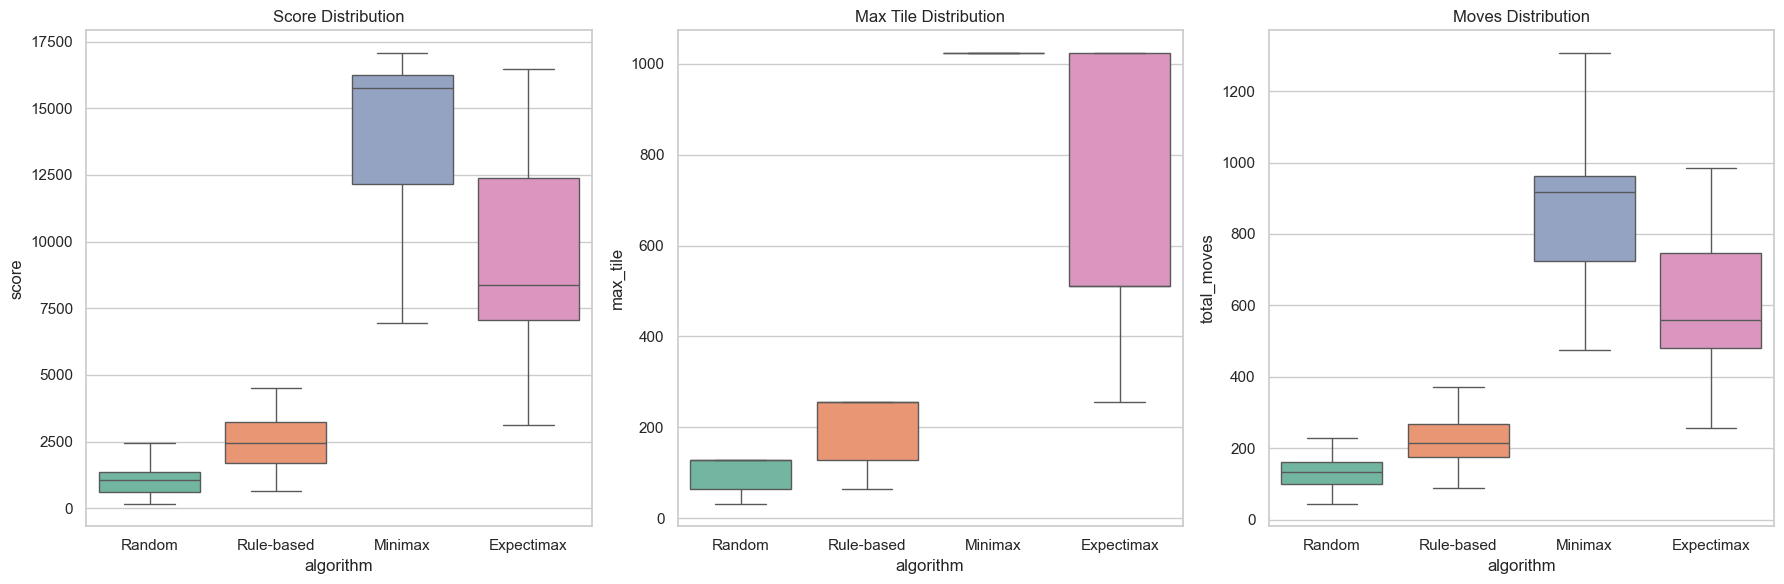

In [144]:
df = pd.read_csv('results/combined_solver_results.csv')

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='algorithm', y='score', data=df, ax=axes[0], hue='algorithm', palette="Set2", showfliers=False)
axes[0].set_title('Score Distribution')

sns.boxplot(x='algorithm', y='max_tile', data=df, ax=axes[1], hue='algorithm', palette="Set2", showfliers=False)
axes[1].set_title('Max Tile Distribution')

sns.boxplot(x='algorithm', y='total_moves', data=df, ax=axes[2], hue='algorithm', palette="Set2", showfliers=False)
axes[2].set_title('Moves Distribution')

plt.tight_layout()

plt.show()


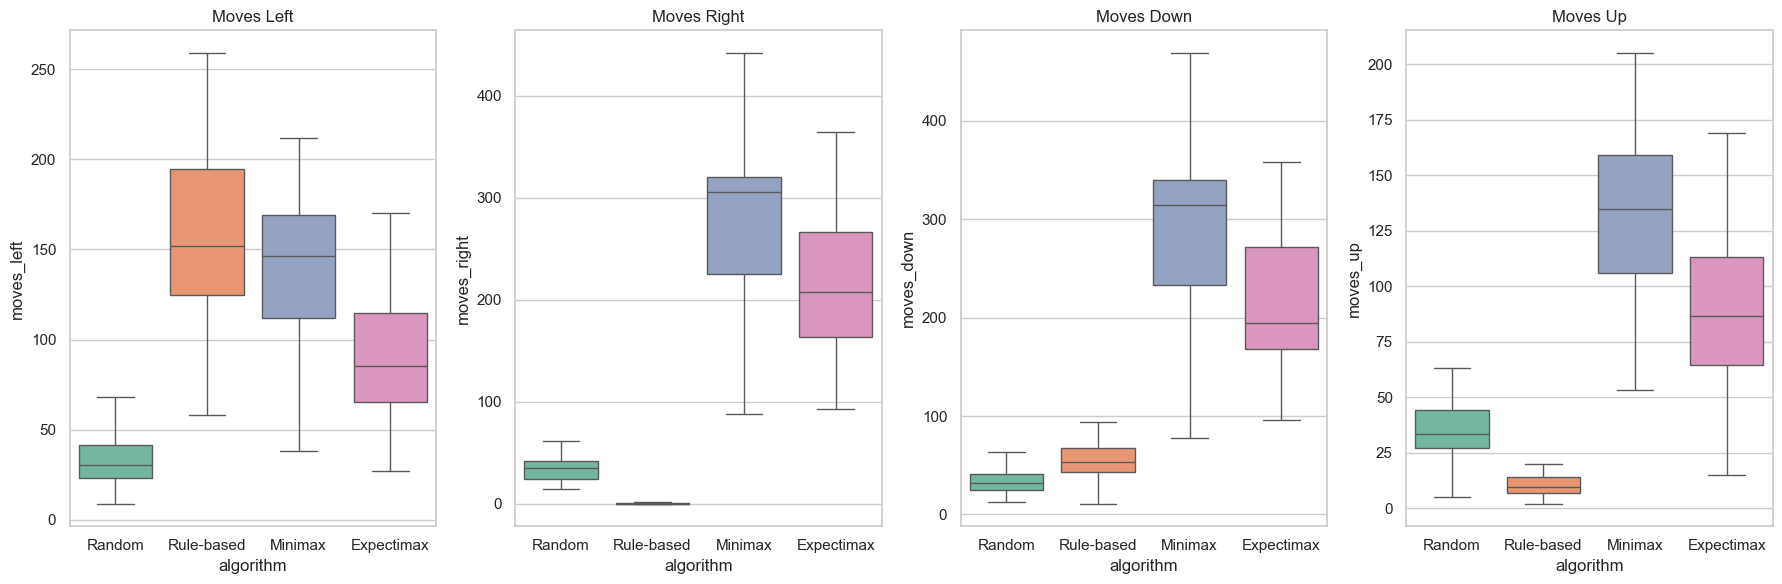

In [145]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

sns.boxplot(x='algorithm', y='moves_left', data=df, ax=axes[0], hue='algorithm', palette="Set2", showfliers=False)
axes[0].set_title('Moves Left')

sns.boxplot(x='algorithm', y='moves_right', data=df, ax=axes[1], hue='algorithm', palette="Set2", showfliers=False)
axes[1].set_title('Moves Right')

sns.boxplot(x='algorithm', y='moves_down', data=df, ax=axes[2], hue='algorithm', palette="Set2", showfliers=False)
axes[2].set_title('Moves Down')

sns.boxplot(x='algorithm', y='moves_up', data=df, ax=axes[3], hue='algorithm', palette="Set2", showfliers=False)
axes[3].set_title('Moves Up')

plt.tight_layout()

plt.show()